# 5. Implement the crawling task
Choosing a mall shop in SHOPEE.VN with more than 20 products. Writing a program to estimate the revenues of this shop DAILY in ONE WEEK.

Drawing the graph of the collected daily revenues in time series.

#Mã id Store:


svrvietnam_officialstore


In [ ]:
# Cài các thư viện cần thiết
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 4.3 MB/s 
     |████████████████████████████████| 384 kB 51.1 MB/s 
     |████████████████████████████████| 140 kB 54.8 MB/s 
     |████████████████████████████████| 58 kB 6.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machin

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import numpy as np
from bs4 import BeautifulSoup as BS
import urllib.request
import matplotlib.pyplot as plt
from time import sleep

In [ ]:
from selenium.webdriver.chromium import options

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(executable_path='/usr/bin/chromedriver',chrome_options = chrome_options)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [ ]:


def default(a):
  # Hàm dùng để conver các giá trị string trong giá tiền, số lượng bán ra thành dạng chuỗi số
  # 24  2k  2,1k  2.34k 2.024 'Đã bán 2,5k' ....
  if a=='' or a== None:
    return '0'
  a = a.get_text()
  a= a.replace('Đã bán ','')
  number = 0
  for i in a[::-1]:
     if not (i == ',' or i=='.'):
        number+=1
     else:
       break
  if number == len(a):
    if('k' in a):
      return ((a.replace(',','')).replace('.','')).replace('k','')+ '000'
    return a
  else:
    if 'k' not in a:
      return (a.replace(',','')).replace('.','')
    else:
      return ((a.replace(',','')).replace('.','')).replace('k','')+ (4-number) *'0'


# print(default('2400'))
# print(default(''))
# print(default('2k'))
# print(default('2.1k'))
# print(default('Đã bán 18,3k'))
# print(default(None))
# print(('Đã bán 18,3k').replace('Đã bán ',''))

In [ ]:
def downLoadDataFromShoppe(idStore):
  # Đường dẫn tới link danh sách sản phẩn
  url = f'https://shopee.vn/{idStore}?page=3&sortBy=pop&tab=2'
  # Truy cập vào đường dẫn
  driver.get(url)
  #Tạm ngưng 10s để driver loading data
  sleep(10)
  # lấy dữ liệu html
  html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
  soup = BS(html,"html.parser")

  # danh sách tên sản phẩm
  products = []
  # danh sách giá sản phẩm
  prices = []
  # danh sách số lượng bản ra
  amounts =[]
  # lấy tổng danh sách sản phẩn
  number_product_max = int(soup.find('div',class_='section-seller-overview__item-text-value').get_text())
  #Số thứ tự trang bắt đầu bằng 0
  page = 0
  # Nếu như số sản phẩm crawl được nhỏ hơn tổng sổ sản phẩm của của hàng thì thực thi các lệnh trong while
  while(len(products)<= number_product_max): 
    # tạo url dựa trên id store và số thứ tự trang.
    url = f'https://shopee.vn/{idStore}?page={page}&sortBy=pop&tab=2'
    # tăng biến đếm pape lên 1
    page = page + 1
    #Lấy data
    driver.get(url)
    #Dừng 5 giây để chưng trình loading data đầy đủ
    sleep(5)
    # Lấy mã HTML
    html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
    soup = BS(html,"html.parser")
    # Câu lệnh filter để lấy ra những dòng hmtl mong muốn
    listProduct = soup.find('div',class_='shop-page__all-products-section').find_all('div',class_='_3DGyGY')
    # Lập lấy danh sách tên sản phẩm, giá, số lượng bản ra
    for i in listProduct:
      #Lấy tên sản phẩm
      product= i.find('div',class_='_3Gla5X _2j2K92 _3j20V6')
      products.append(product.get_text())
      #Lấy số lượng bán ra
      amount = i.find('div',class_='_2Tc7Qg _2R-Crv')
      amounts.append(int(default(amount)))
      #Lấy giá sản phẩm
      price = i.find('span',class_='_3TJGx5')
      prices.append(int(default(price)))
  # Hàm trả về danh sách tên sản phẩm, số lượng bản ra và giá sản phẩm
  return products, amounts, prices




In [ ]:



# Hàm in danh sách sản phẩm kèm giá tiền và số lượng bán ra theo idStore
def DisplayListProduct(idStore):
  # Lấy data bằng cái gọi lại hàm downLoadDataFromShoppe truyền vào mã idStore
  getData = downLoadDataFromShoppe(idStore)
  # Duyệt các phần tử trong data
  for j in range(len(getData[0])):
    print("---",j+1,"---")
    # In tên sản phẩn j+1
    print(getData[0][j])
    # In số lượng bản ra sản phẩm j+1
    print("amount:",getData[1][j])
    # In giá tiền sản phẩm j+1
    print("price",getData[2][j])

# Gọi lại hàm DisplayListProduct
DisplayListProduct('svrvietnam_officialstore')


--- 1 ---
Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml
amount: 875
price 405000
--- 2 ---
Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml
amount: 904
price 405000
--- 3 ---
Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml
amount: 631
price 139500
--- 4 ---
Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml
amount: 521
price 112500
--- 5 ---
Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml
amount: 220
price 225000
--- 6 ---
Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml
amount: 782
price 315000
--- 7 ---
Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml
amount: 859
price 594000
--- 8 ---
Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml
amount: 327
price 490500
--- 9 ---
Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml
amount: 272
price 306000
--- 1

In [ ]:
from datetime import datetime
import pytz

# Lấy ngày, giờ hiện tại
now = datetime.now(pytz.timezone('Asia/Ho_Chi_Minh') ).strftime("%d/%m/%Y %H:%M:%S")
# Gọi lại hàm RevenueDay
data =downLoadDataFromShoppe('svrvietnam_officialstore')

# In các giá trị trong data vào thời điểm now
# print("Doanh thu tính đến ngày ",now,"là: ",RevenueDay('svrvietnam_officialstore')[1])

print("Data tính đến ngày ",now,"là: ")
print('products =',data[0])
print('amounts =',data[1])
print('prices =',data[2])



Data tính đến ngày  21/10/2022 00:16:19 là: 
products = ['Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', 'Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', 'Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', 'Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm 

In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
class ProductShoppee:
  def __init__(self):
    self.products =[]
    self.amounts =[]
    self.prices =[]


  def addProduct(self,products,amounts,prices):
    for i in range(len(products)):
      if ('[' in products[i] and ']' in products[i]):
        products[i] =products[i].split('] ')[1]
        
      if products[i] not in self.products:
        self.products.append(products[i])
        self.amounts.append(amounts[i])
        self.prices.append(prices[i])


    listSort = numpy.argsort(self.products)

    self.products =   [self.products[i] for i in listSort]
    self.amounts  =   [self.amounts[i]   for i in listSort]
    self.prices  =   [self.prices[i]    for i in listSort]
    

class list_productShoppee:
  def __init__(self):
    self.lst = []
    self.lstDay = []
    self.lstRevenue = []

    
  def addLst(self, day, productShoppee):
    self.lstDay.append(day)
    self.lst.append(productShoppee)

    if len(self.lst)>1:
      if len(self.lst[-1].products) < len(self.lst[-2].products):
        products_additional = list(set(self.lst[-2].products) - set(self.lst[-1].products))
        for i in products_additional:
          indexOld  = ( self.lst[-2].products).index(i)
          self.lst[-1].products.append(i)
          self.lst[-1].amounts.append(self.lst[-2].amounts[indexOld])
          self.lst[-1].prices.append(self.lst[-2].prices[indexOld])




  def empty(self):
    return len(self.lst) == 0

  
  def resetData(self):
    self.lst = []
    self.lstDay = []
    self.lstRevenue = []

  
  def getRevenueDay(self):
    lst = [000000]
    if len(self.lst)<=1:
      return lst
    else:
      for i in range(1,len(self.lst)):
        temp = 0
        for j in range( len(self.lst[i].products)):
          if self.lst[i].products[j] in self.lst[i-1].products:
            indexOld = self.lst[i-1].products.index(self.lst[i].products[j])
            temp = temp +  (self.lst[i].amounts[j]-self.lst[i-1].amounts[indexOld])*self.lst[i].prices[j]
          else:
            temp = temp +  (self.lst[i].amounts[j])*self.lst[i].prices[j]


        lst.append(temp)
    return lst

  def getRevenue(self):
     lstRevenue =[]
     if len(self.lst)==0:
       lstRevenue.append(0)
     sum = 0
     data0 = self.lst[0]
     for i in range(len(data0.prices)): 
        sum = sum + data0.prices[i] * data0.amounts[i]
        
     for i in range(0,len(self.lst)):
        sum = sum + self.getRevenueDay()[i]
        lstRevenue.append(sum)
     return lstRevenue
    
  def dislay(self):

    data = []
    for i in range(len(self.lst)):
      temp =[self.lstDay[i],self.getRevenueDay()[i],self.getRevenue()[i]]
      data.append(temp)
    columns = ['Ngày','Doanh Thu trong ngày','Tổng Doanh Thu']
    dt = pd.DataFrame.from_records(data,columns = columns)
    display(dt)

  def DrawDiagram(self):

    # Vẽ biểu đồ
    plt.title('DOANH THU MỘT SHOPPEE MALL')
    plt.ylabel('Đồng')
    plt.bar(self.lstDay[1::],self.getRevenueDay()[1::],color='g', width=0.3)
    plt.setp(plt.gca().get_xticklabels(), rotation=50, horizontalalignment='right')
    plt.legend(['Doanh thu trong ngày'],bbox_to_anchor =(1.44,-0.2), loc='lower right')
    plt.twinx()
    plt.ylabel('Đồng')
    plt.plot(self.lstDay[1::],self.getRevenue()[1::], 'y', marker='o',)
    
    plt.legend(['Tổng Doanh Thu'],bbox_to_anchor =(1.44,-0.3), loc='lower right')
    plt.show()
    

      



  




In [ ]:
list_productShoppee = list_productShoppee()

,Ngày,Doanh Thu trong ngày,Tổng Doanh Thu
0,08/10/2022,0,5806353000
1,09/10/2022,20437750,5826790750
2,10/10/2022,7747250,5834538000
3,11/10/2022,57506500,5892044500
4,12/10/2022,22935250,5914979750
5,13/10/2022,86758500,6001738250
6,14/10/2022,22827000,6024565250
7,15/10/2022,92180750,6116746000
8,20/10/2022,98741750,6215487750


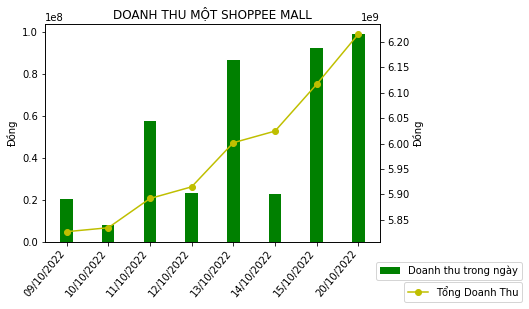

In [ ]:
 
# LƯU TRỮ DATA THEO NGÀY
# đường link shoppe  Mall chính : https://shopee.vn/svrvietnam_officialstore?page=1&sortBy=pop&tab=2


if not (list_productShoppee.empty()):
  list_productShoppee.resetData()


# Data tính đến ngày 08/10/2022 19:53:32 là:  7638117000
products = ['[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', '[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', '[Mã FMCGMALL -8% đơn 250K] Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', '[Mã FMCGMALL -8% đơn 250K] Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', '[Mã FMCGMALL -8% đơn 250K] Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', '[Mã FMCGMALL -8% đơn 250K] Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', '[Mã FMCGMALL -8% đơn 250K] Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire']
amounts = [841, 833, 3600, 608, 2000, 505, 217, 735, 358, 1800, 815, 320, 259, 130, 227, 206, 155, 170, 252, 156, 131, 130, 86, 92, 95, 16, 50, 62, 64, 51, 43, 41, 18, 38, 96, 38, 51, 385, 0, 3, 26, 58, 11, 18, 7, 4, 0, 25, 11, 2, 1, 6, 0, 0, 0, 0, 0, 1100, 187, 55, 1100, 187, 55, 1100, 187, 55, 1100, 187, 55]
prices = [405000, 405000, 126000, 139500, 342000, 112500, 225000, 315000, 225250, 468000, 594000, 490500, 306000, 148500, 477000, 288000, 324000, 373500, 373500, 265500, 495000, 373500, 171000, 293250, 684000, 125000, 378000, 490500, 1035000, 495000, 657000, 405000, 360000, 1093500, 855000, 891000, 990000, 405000, 782000, 891000, 790000, 409500, 387000, 535500, 342000, 465000, 567000, 990000, 405000, 1170000, 1170000, 459000, 1170000, 360000, 445500, 399500, 369000, 450000, 449000, 575000, 450000, 449000, 575000, 450000, 449000, 575000, 450000, 449000, 575000]
day = ['08/10/2022',(products,amounts,prices)]
productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('08/10/2022',productShoppee)



# Data tính đến ngày 09/10/2022 20:08:46 là:  
products = ['[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', '[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', '[Mã FMCGMALL -8% đơn 250K] Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', '[Mã FMCGMALL -8% đơn 250K] Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', '[Mã FMCGMALL -8% đơn 250K] Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', '[Mã FMCGMALL -8% đơn 250K] Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', '[Mã FMCGMALL -8% đơn 250K] Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire']
amounts = [843, 834, 3700, 608, 2000, 505, 217, 738, 359, 1800, 817, 321, 259, 130, 227, 207, 155, 170, 252, 156, 131, 130, 86, 92, 95, 16, 50, 62, 64, 51, 43, 41, 18, 38, 97, 38, 51, 387, 4, 0, 26, 58, 11, 18, 7, 6, 0, 25, 11, 2, 1, 6, 0, 0, 0, 0, 0, 1100, 187, 55, 1100, 187, 55, 1100, 187, 55, 1100, 187, 55]
prices = [405000, 405000, 126000, 139500, 342000, 112500, 225000, 315000, 225250, 468000, 594000, 490500, 306000, 148500, 477000, 288000, 324000, 373500, 373500, 265500, 495000, 373500, 171000, 293250, 684000, 125000, 378000, 490500, 1035000, 495000, 657000, 405000, 360000, 1093500, 855000, 891000, 990000, 405000, 891000, 782000, 790000, 409500, 387000, 535500, 342000, 465000, 567000, 990000, 405000, 1170000, 1170000, 459000, 1170000, 360000, 445500, 399500, 369000, 450000, 449000, 575000, 450000, 449000, 575000, 450000, 449000, 575000, 450000, 449000, 575000]

productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('09/10/2022',productShoppee)


#  Data tính đến ngày  10/10/2022 19:56:02 là: 
products = ['[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', '[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', '[Mã FMCGMALL -8% đơn 250K] Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', '[Mã FMCGMALL -8% đơn 250K] Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', '[Mã FMCGMALL -8% đơn 250K] Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', '[Mã FMCGMALL -8% đơn 250K] Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', '[Mã FMCGMALL -8% đơn 250K] Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml']
amounts = [846, 837, 3700, 611, 2000, 505, 217, 740, 1800, 817, 321, 259, 130, 227, 207, 155, 252, 156, 132, 130, 86, 92, 95, 16, 50, 62, 64, 51, 43, 41, 18, 38, 97, 38, 51, 388, 4, 0, 28, 11, 7, 6, 0, 25, 13, 2, 1, 6, 0, 0, 0, 0, 1100, 360, 188, 170, 55, 58, 18, 1, 1100, 360, 188, 170, 55, 58, 18, 1]
prices = [382500, 405000, 119000, 139500, 323000, 106250, 212500, 315000, 442000, 594000, 465000, 289000, 148500, 450500, 288000, 306000, 352750, 265500, 467500, 352750, 161500, 293250, 684000, 125000, 357000, 490500, 1035000, 495000, 657000, 405000, 360000, 1093500, 855000, 841500, 935000, 405000, 891000, 782000, 790000, 387000, 342000, 465000, 567000, 990000, 405000, 1170000, 1170000, 459000, 1170000, 360000, 445500, 369000, 450000, 225250, 449000, 352750, 575000, 386750, 505750, 399500, 450000, 225250, 449000, 352750, 575000, 386750, 505750, 399500]

productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('10/10/2022',productShoppee)



# Data tính đến ngày  11/10/2022 19:56:51 là: 
products = ['[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', '[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', '[Mã FMCGMALL -8% đơn 250K] Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', '[Mã FMCGMALL -8% đơn 250K] Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', '[Mã FMCGMALL -8% đơn 250K] Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', '[Mã FMCGMALL -8% đơn 250K] Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', '[Mã FMCGMALL -8% đơn 250K] Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Kem làm giảm mụn và giúp loại bỏ dầu SVR SEBIACLEAR Active 40ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Bộ đôi Kem Giảm Tác Nhân Gây Mụn Sebiaclear Active và Nước Tẩy Trang SEBIACLEAR Eau Micellaire', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml']
amounts = [846, 840, 3700, 612, 2000, 505, 218, 741, 1900, 819, 321, 261, 131, 227, 207, 155, 253, 156, 132, 130, 86, 92, 95, 16, 50, 62, 64, 52, 43, 41, 19, 39, 97, 38, 51, 4, 0, 29, 11, 8, 6, 14, 0, 25, 2, 1, 6, 0, 0, 0, 0, 1100, 362, 188, 170, 55, 390, 59, 19, 3, 1100, 362, 188, 170, 55, 390, 59, 19, 3]
prices = [405000, 405000, 126000, 139500, 342000, 112500, 225000, 315000, 468000, 594000, 490500, 306000, 148500, 477000, 288000, 324000, 373500, 265500, 495000, 373500, 171000, 293250, 684000, 125000, 378000, 490500, 1035000, 495000, 657000, 405000, 360000, 1093500, 855000, 891000, 990000, 891000, 782000, 790000, 387000, 342000, 465000, 405000, 567000, 990000, 1170000, 1170000, 459000, 1170000, 360000, 445500, 369000, 450000, 225250, 449000, 373500, 575000, 405000, 409500, 535500, 399500, 450000, 225250, 449000, 373500, 575000, 405000, 409500, 535500, 399500]
productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('11/10/2022',productShoppee)
d1 = productShoppee.products
# Data tính đến ngày  12/10/2022 20:10:43 là: 
products = ['[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', '[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', 'Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', '[Mã FMCGMALL -8% đơn 250K] Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', 'Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', 'Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', 'Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', 'Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', 'Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', 'Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', '[Mã FMCGMALL -8% đơn 250K] Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml']
amounts = [853, 848, 3700, 613, 2000, 507, 218, 746, 1900, 822, 322, 266, 131, 227, 207, 155, 253, 156, 133, 130, 86, 93, 96, 16, 50, 64, 62, 52, 43, 19, 39, 97, 39, 51, 4, 0, 30, 11, 9, 6, 15, 4, 2, 1, 6, 0, 26, 0, 0, 0, 366, 188, 171, 41, 393, 59, 21, 4, 366, 188, 171, 41, 393, 59, 21, 4]
prices = [405000, 405000, 126000, 139500, 342000, 112500, 225000, 315000, 468000, 594000, 490500, 306000, 148500, 477000, 288000, 324000, 373500, 265500, 495000, 373500, 171000, 293250, 684000, 125000, 378000, 1035000, 490500, 495000, 657000, 360000, 1093500, 855000, 891000, 990000, 891000, 782000, 790000, 387000, 342000, 465000, 405000, 567000, 1170000, 1170000, 459000, 1170000, 990000, 360000, 445500, 369000, 225250, 449000, 373500, 405000, 405000, 409500, 535500, 399500, 225250, 449000, 373500, 405000, 405000, 409500, 535500, 399500]
productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('12/10/2022',productShoppee)




# Data tính đến ngày  13/10/2022 19:58:57 là: 
products = ['Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', 'Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', 'Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', 'Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', 'Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', 'Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', 'Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', 'Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', 'Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', 'Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', 'Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', 'Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', 'Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml']
amounts = [854, 856, 3800, 621, 2000, 508, 218, 755, 1900, 829, 322, 266, 131, 227, 208, 155, 253, 156, 135, 130, 87, 94, 96, 16, 50, 64, 62, 52, 43, 19, 39, 97, 39, 52, 4, 0, 32, 12, 10, 6, 18, 4, 26, 2, 1, 6, 0, 0, 0, 0, 367, 190, 172, 41, 401, 60, 21, 5, 367, 190, 172, 41, 401, 60, 21, 5]
prices = [405000, 405000, 126000, 139500, 342000, 112500, 225000, 315000, 468000, 594000, 490500, 306000, 148500, 477000, 288000, 324000, 373500, 265500, 495000, 373500, 171000, 293250, 684000, 125000, 378000, 1035000, 490500, 495000, 657000, 360000, 1093500, 855000, 891000, 990000, 891000, 782000, 790000, 387000, 342000, 465000, 405000, 567000, 990000, 1170000, 1170000, 459000, 1170000, 360000, 445500, 369000, 225250, 449000, 373500, 405000, 405000, 409500, 535500, 399500, 225250, 449000, 373500, 405000, 405000, 409500, 535500, 399500]
productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('13/10/2022',productShoppee)



# Data tính đến ngày  14/10/2022 20:02:13 là: 
products = ['Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', 'Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', 'Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', '[Mã FMCGMALL -8% đơn 250K] Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', 'Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', 'Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', 'Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', 'Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', '[Mã FMCGMALL -8% đơn 250K] Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', 'Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', 'Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', 'Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml']
amounts = [859, 866, 3800, 624, 2000, 509, 218, 761, 1900, 836, 325, 268, 131, 230, 211, 156, 254, 156, 135, 130, 87, 94, 97, 16, 50, 64, 62, 52, 43, 19, 40, 97, 40, 52, 4, 0, 33, 12, 10, 18, 6, 4, 26, 2, 1, 6, 0, 0, 0, 0, 369, 190, 173, 41, 402, 61, 21, 5, 369, 190, 173, 41, 402, 61, 21, 5]
prices = [405000, 405000, 126000, 139500, 342000, 112500, 225000, 315000, 468000, 594000, 490500, 306000, 148500, 477000, 288000, 324000, 373500, 265500, 495000, 373500, 171000, 293250, 684000, 125000, 378000, 1035000, 490500, 495000, 657000, 360000, 1093500, 855000, 891000, 990000, 891000, 782000, 790000, 387000, 342000, 405000, 465000, 567000, 990000, 1170000, 1170000, 459000, 1170000, 360000, 445500, 369000, 225250, 449000, 373500, 405000, 405000, 409500, 535500, 399500, 225250, 449000, 373500, 405000, 405000, 409500, 535500, 399500]
productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('14/10/2022',productShoppee)

# Data tính đến ngày  15/10/2022 20:41:28 là: 
products = ['[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', '[Mã FMCGMALL -8% đơn 250K] Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', '[Mã FMCGMALL -8% đơn 250K] Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', '[Mã FMCGMALL -8% đơn 250K] Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', '[Mã FMCGMALL -8% đơn 250K] Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', '[Mã FMCGMALL -8% đơn 250K] Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', '[Mã FMCGMALL -8% đơn 250K] Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', '[Mã FMCGMALL -8% đơn 250K] Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', '[Mã FMCGMALL -8% đơn 250K] Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', '[Mã FMCGMALL -8% đơn 250K] Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml']
amounts = [861, 877, 3800, 626, 2100, 513, 219, 765, 838, 325, 268, 131, 230, 211, 156, 156, 136, 130, 87, 94, 98, 16, 50, 64, 62, 52, 43, 19, 40, 97, 40, 53, 4, 0, 33, 62, 12, 18, 10, 6, 4, 26, 2, 1, 6, 0, 0, 0, 0, 369, 2000, 190, 173, 255, 41, 408, 22, 6, 369, 2000, 190, 173, 255, 41, 408, 22, 6]
prices = [382500, 405000, 119000, 139500, 323000, 106250, 212500, 315000, 594000, 465000, 289000, 148500, 450500, 288000, 306000, 265500, 467500, 352750, 161500, 293250, 684000, 125000, 357000, 1035000, 490500, 495000, 657000, 360000, 1093500, 855000, 841500, 935000, 891000, 782000, 790000, 386750, 387000, 405000, 342000, 465000, 567000, 990000, 1170000, 1170000, 459000, 1170000, 360000, 445500, 369000, 225250, 442000, 449000, 352750, 352750, 405000, 405000, 505750, 399500, 225250, 442000, 449000, 352750, 352750, 405000, 405000, 505750, 399500]
productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('15/10/2022',productShoppee)


# Data tính đến ngày  20/10/2022 21:10:32 là: 
products = ['Nước làm sạch da, tẩy trang và giúp loại bỏ dầu SVR SEBIACLEAR Eau Micellaire 400ml', 'Kem dưỡng da làm giảm mụn SVR SEBIACLEAR Mat + Pores 40ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 55ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 200ml', 'Nước làm sạch da, tẩy trang và giúp loại bỏ dầu cho da SVR SEBIACLEAR Eau Micellaire 75ml', 'Kem dưỡng dành cho da rất khô và nứt nẻ ở bàn chân SVR XERIAL 30 Creme Pieds 50ml', 'Nước cân bằng da dành cho da dầu, mụn SVR Sebiaclear Micro Peel 150ml', 'Serum Giảm Tác Nhân Từ Bên Ngoài Gây Nên Tình Trạng Mụn SVR Sebiaclear Serum 30ml', 'Gel rửa mặt dành cho da nhạy cảm SVR PHYSIOPURE Gelee Moussante 200ml', 'Kem dưỡng và làm dịu da dành cho da nứt nẻ, mẫn đỏ SVR CICAVIT+ Crème 40ml', 'Sáp dưỡng ẩm môi bị khô, nứt nẻ và tổn thương SVR Topialyse Levres 4g', 'Kem làm giảm mụn và chống nắng cao SVR SEBIACLEAR Creme SPF50+ 40ml', 'Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 200ml', 'Nước tẩy trang giúp làm sạch da mặt, dùng được cho cả mắt và môi SVR PHYSIOPURE Eau Micellaire 200ml', 'Kem dưỡng ẩm cho da thường và da hỗn hợp SVR HYDRALIANE Legere 40ml', 'Gel làm giảm mụn dành da dễ bị mụn SVR SEBIACLEAR Cicapeel 15ml', 'Kem dưỡng da làm giảm vết chai ở bàn chân, bàn tay và khuỷu tay SVR XERIAL 50 Extreme Creme Pieds 50ml', 'Kem chống nắng trong suốt, không nhờn rít SVR SUN SECURE Fluide SPF50+ 50ml', 'Kem dưỡng ẩm cho da khô đến rất khô, dành cho mặt và cổ SVR HYDRALIANE Riche 40ml', 'Nước tẩy trang dạng vi hạt SVR PHYSIOPURE Eau Micellaire 75ml', 'Bộ Đôi Gel Rửa Mặt SVR PHYSIOPURE Gelee Moussante 55ml và Tẩy Trang PHYSIOPURE Eau Micellaire Cho Da Nhạy Cảm 75ml', 'Kem làm mờ vết nám và chống nắng SPF 50 SVR CLAIRIAL Creme SPF50+ 50ml', '[Hàng tặng không bán] Gel làm sạch không chứa xà phòng SVR TOPIALYSE Gel Lavant 55ml', 'Kem dưỡng ẩm giúp làm da mềm dịu dành cho da khô và da bị kích ứng SVR SENSIFINE Masque 50ml', 'Nước cân bằng làm sạch sâu cho da mặt nhạy cảm SVR PHYSIOPURE Tonique 200ml', 'Kem chống nhăn và làm sáng da SVR HYDRACID C20 Creme 30ml', 'Kem chống nắng có SVR SUN SECURE Blur SPF50+ 50ml', '[Nhập SVRV50K giảm 50K] Chống nắng dạng xịt SVR Sun Secure Spray SPF50+ 200ml', 'Sữa tắm dưỡng ẩm SVR TOPIALYSE Huile Lavante 200ml', 'Tinh chất làm mờ vết nám, sáng da và mềm mịn da SVR CLAIRIAL Serum 30ml', 'Tinh chất dưỡng da, ngăn ngừa nếp nhăn, phục hồi da và dưỡng ẩm cho da SVR [B3] Ampoule Hydra 30ml', 'Kem dưỡng giúp làm sáng da SVR CLAIRIAL Night Peel 50ml', 'Dung dịch dưỡng da dạng lõng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 30ml', 'Kem dưỡng ẩm dành cho da dầu mụn, dưỡng da mềm mịn và giúp làm mờ vết thâm sau mụn Sebiaclear Hydra 40ml', 'Gel Tẩy Tế Bào Chết SVR [A] Microgommage Lift 70g', 'Kem làm mờ nám da và làm đồng nhất nước da với SVR CLAIRIAL Day 30ml', 'Combo Tẩy trang SVR Sebiaclear Eau Micellaire 400ml và Rửa mặt SVR Sebiaclear Gel Moussant 400ml giúp làm sạch cho dadầu', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 400ml', 'Dung dịch tẩy trang Mi-xel dạng vi hạt dành cho da nhạy cảm SVR PHYSIOPURE Eau Micellaire 400ml', 'Gel làm sạch dịu nhẹ dành cho da  nhạy cảm, da khô và viêm da cơ địa SVR TOPIALYSE Gel Lavant 1L', 'Kem dưỡng giảm mụn, ngừa thâm SVR SEBIACLEAR ACTIVE GEL 40ml', 'Dung dịch dưỡng da dạng lỏng dưỡng ẩm, chống nhăn và giúp làn da mềm mịn SVR [B3] AMPOULE HYDRA 10ml', 'Dung dịch dưỡng da dạng lỏng giúp làm sáng da và chống nhăn SVR [C] Ampoule Anti-Ox 10ml', 'Kem dưỡng thể giúp làm mềm và dưỡng ẩm dành cho da khô và da cơ địa SVR TOPIALYSE Baume Protect+ 200ml', 'Gel dưỡng da giúp làm se khít lỗ chân lông,chống nhăn,làm da mềm mịn và giúp làm đều màu da SVR [PEPTI] BIOTIC 50ml', 'Kem dưỡng chống nhăn da giúp  làn da mịn màng và đều màu da  dành cho da thường và da khô SVR DENSITIUM Cream 50ml', 'Gel dưỡng ẩm, làm dịu dành cho  da nhạy cảm với công thức siêu tối giản SVR SENSIFINE Aqua - Gel 40ml', 'Gel dưỡng ẩm chống nhăn trẻ hóa và dưỡng ẩm dành cho da mất nước, xỉn màu và nhạy cảm SVR [HYALU] BIOTIC 50ML', 'Tinh chất dưỡng da ngăn ngừa dấu hiệu lão hóa và giúp da mềm mịn SVR [A] Ampoule Lift 30ml', 'Kem chống nắng SPF50+, giúp bảo vệ da và dưỡng ẩm da SVR SUN SECURE SPRAY POCKET SPF50+ 20ml', 'Kem dưỡng da toàn thân dành cho da khô, giúp giữ ẩm da SVR XERIAL 10 Lait 200ml', 'Kem dưỡng da toàn thân dành cho da rất khô, giúp giữ ẩm da; da vùng cánh tay, khuỷu tay hoặc chân SVR XERIAL 30', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml', 'Sữa rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 55ml', 'Bộ Đôi Gel Rửa Mặt SVR SEBIACLEAR Gel Moussant 55ml và Tẩy Trang SEBIACLEAR Eau Micellaire Cho Da Dầu Mụn 75ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant 400ml', 'Bộ đôi Kem làm giảm mụn SVR Sebiaclear Active 40ml và Gel rửa mặt không xà phòng Sebiaclear Gel Moussant 55ml', 'Sữa dưỡng thể SVR XERIAL 10 Lait Corps 200ml', 'Gel rửa mặt không có xà phòng, làm sạch và loại bỏ tế bào da chết SVR SEBIACLEAR Gel Moussant dạng túi 400ml']
amounts = [875, 904, 631, 2100, 521, 220, 782, 859, 327, 272, 132, 231, 213, 159, 176, 259, 158, 139, 131, 88, 94, 99, 17, 50, 63, 64, 53, 44, 19, 40, 98, 40, 56, 417, 0, 4, 43, 23, 62, 24, 13, 12, 12, 4, 2, 1, 6, 0, 26, 0, 0, 0, 4000, 372, 2000, 190, 43, 7, 4000, 372, 2000, 190, 43, 7, 4000, 372, 2000, 190, 43, 7]
prices = [405000, 405000, 139500, 342000, 112500, 225000, 315000, 594000, 490500, 306000, 148500, 477000, 288000, 324000, 373500, 373500, 265500, 495000, 373500, 171000, 293250, 684000, 125000, 378000, 490500, 1035000, 495000, 657000, 360000, 1093500, 855000, 891000, 990000, 405000, 782000, 891000, 790000, 405000, 409500, 535500, 465000, 342000, 387000, 567000, 1170000, 1170000, 459000, 1170000, 990000, 360000, 445500, 369000, 126000, 225250, 468000, 449000, 405000, 399500, 126000, 225250, 468000, 449000, 405000, 399500, 126000, 225250, 468000, 449000, 405000, 399500]
productShoppee = ProductShoppee()
productShoppee.addProduct(products,amounts,prices)
list_productShoppee.addLst('20/10/2022',productShoppee)

list_productShoppee.dislay()
list_productShoppee.DrawDiagram()

